# Métodos hierárquicos de agrupamento - Tarefa

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [15]:
p = sns.load_dataset('penguins')
p.index.name='id'
p_num = p.select_dtypes(include='number').dropna()

In [16]:
p.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
id,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [17]:
padrão = StandardScaler()
p_pad = padrão.fit_transform(p_num)

In [18]:
clus = AgglomerativeClustering(linkage="complete", 
                           distance_threshold = None,
                           n_clusters=3)

In [19]:
clus.fit(p_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

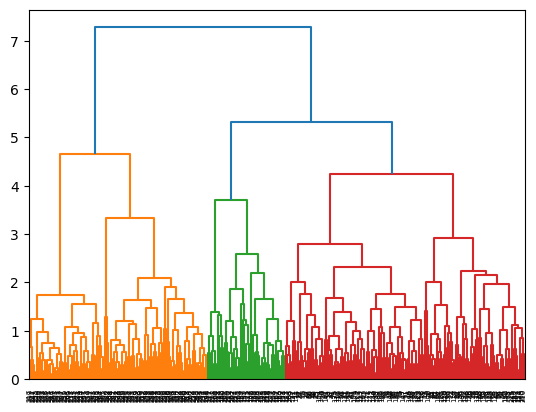

In [20]:
d = shc.dendrogram(shc.linkage(p_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [21]:
p_num['grupo'] = clus.labels_
p_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


In [22]:
p = p.merge(p_num['grupo'], how='left', on='id')
p.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0


In [23]:
pd.crosstab(p['species'], p_num['grupo'])

grupo,0,1,2
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


In [24]:
pd.crosstab(p['body_mass_g'], p_num['grupo'])

grupo,0,1,2
body_mass_g,,,
2700.0,0,0,1
2850.0,0,2,0
2900.0,0,4,0
2925.0,0,1,0
2975.0,0,1,0
...,...,...,...
5850.0,3,0,0
5950.0,2,0,0
6000.0,2,0,0


In [25]:
p.groupby(['grupo', 'species', 'body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']).count()

island  \
grupo species   body_mass_g bill_length_mm bill_depth_mm flipper_length_mm           
0.0   Gentoo    3950.0      42.7           13.7          208.0                   1   
                4100.0      44.5           14.3          216.0                   1   
                4150.0      42.0           13.5          210.0                   1   
                4200.0      45.3           13.8          208.0                   1   
                            45.5           13.9          210.0                   1   
...                                                                            ...   
2.0   Chinstrap 4400.0      49.2           18.2          195.0                   1   
                4450.0      50.8           18.5          201.0                   1   
                4500.0      53.5           19.9          205.0                   1   
                4550.0      52.8           20.0          205.0                   1   
                4800.0      52.0           20.7          210.0                   1   

                                                                            sex  
grupo species   body_mass_g bill_length_mm bill_depth_mm flipper_length_mm       
0.0   Gentoo    3950.0      42.7           13.7          208.0                1  
                4100.0      44.5           14.3          216.0                0  
                4150.0      42.0           13.5          210.0                1  
                4200.0      45.3           13.8          208.0                1  
                            45.5           13.9          210.0                1  
...                                                                         ...  
2.0   Chinstrap 4400.0      49.2           18.2          195.0                1  
                4450.0      50.8           18.5          201.0                1  
                4500.0      53.5           19.9          205.0                1  
                4550.0      52.8           20.0          205.0                1  
                4800.0      52.0           20.7          210.0                1  

[342 rows x 2 columns]

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [6]:
padrão = StandardScaler()
p_pa = padrão.fit_transform(p_num)

In [7]:
ag = AgglomerativeClustering(linkage="complete", 
                           distance_threshold = None,
                           n_clusters=4)

In [8]:
ag.fit(p_pa)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [9]:
p_num['grupo'] = ag.labels_
p_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0


In [11]:
p = p.merge(p_num['grupo'], how='left', on='id')
p.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.0


In [12]:
pd.crosstab(p['species'], p_num['grupo'])

grupo,0,1,2,3
species,,,,
Adelie,151,0,0,0
Chinstrap,14,0,54,0
Gentoo,0,71,0,52


In [13]:
p.groupby(['grupo', 'species', 'sex']).count()

island  bill_length_mm  bill_depth_mm  \
grupo species   sex                                             
0.0   Adelie    Female      73              73             73   
                Male        73              73             73   
      Chinstrap Female      14              14             14   
1.0   Gentoo    Female       9               9              9   
                Male        61              61             61   
2.0   Chinstrap Female      20              20             20   
                Male        34              34             34   
3.0   Gentoo    Female      49              49             49   

                        flipper_length_mm  body_mass_g  
grupo species   sex                                     
0.0   Adelie    Female                 73           73  
                Male                   73           73  
      Chinstrap Female                 14           14  
1.0   Gentoo    Female                  9            9  
                Male                   61           61  
2.0   Chinstrap Female                 20           20  
                Male                   34           34  
3.0   Gentoo    Female                 49           49